In [18]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [22]:
# Load the dataset

df = pd.read_csv('airlines_flights_data.csv')

In [23]:
# Drop index column because it is not useful

df.drop(columns=['index'], inplace=True)

In [24]:
# Basic Summary Statistics

print("\n Descriptive Statistics:")
print(df.describe(include='all'))


 Descriptive Statistics:
        airline  flight source_city departure_time   stops arrival_time  \
count    300153  300153      300153         300153  300153       300153   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127859    3235       61343          71146  250863        91538   
mean        NaN     NaN         NaN            NaN     NaN          NaN   
std         NaN     NaN         NaN            NaN     NaN          NaN   
min         NaN     NaN         NaN            NaN     NaN          NaN   
25%         NaN     NaN         NaN            NaN     NaN          NaN   
50%         NaN     NaN         NaN            NaN     NaN          NaN   
75%         NaN     NaN         NaN            NaN     NaN          NaN   
max         NaN     NaN         NaN            NaN     NaN          NaN   

       destination_city    class       duration      days_left          p

In [25]:
# Check for null values

print("\n Missing values per column:")
print(df.isnull().sum())


 Missing values per column:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [26]:
# Handle Missing Values

# For numerical columns we use mean or median
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['days_left'].fillna(df['days_left'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# For categorical columns we use mode (i.e., most frequent value)
categorical_cols_with_nulls = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for col in categorical_cols_with_nulls:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-148463164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mean(), inplace=True)
/tmp/ipython-input-148463164.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [27]:
# Recheck for the missing values

print("\n Missing values after handling:")
print(df.isnull().sum())


 Missing values after handling:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [28]:
# Numeric Columns Analysis

numeric_cols = ['duration', 'days_left', 'price']

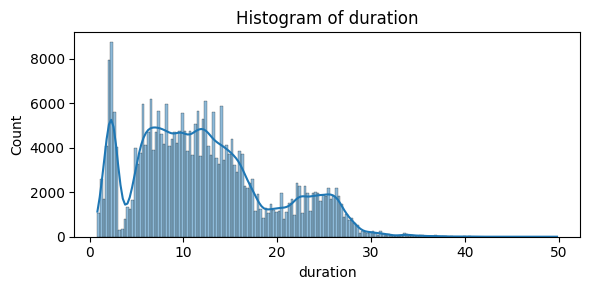

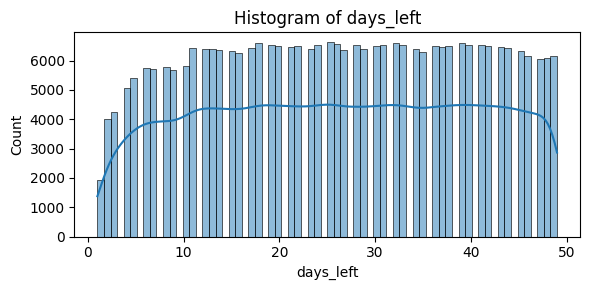

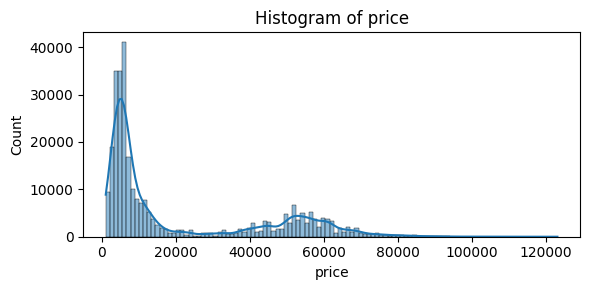

In [29]:
# Histograms

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

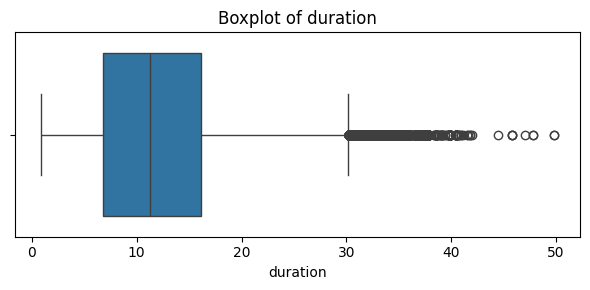

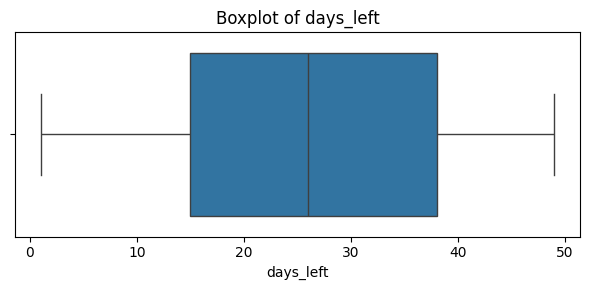

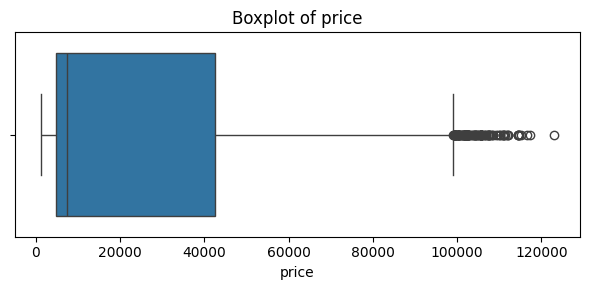

In [30]:
# Boxplots

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

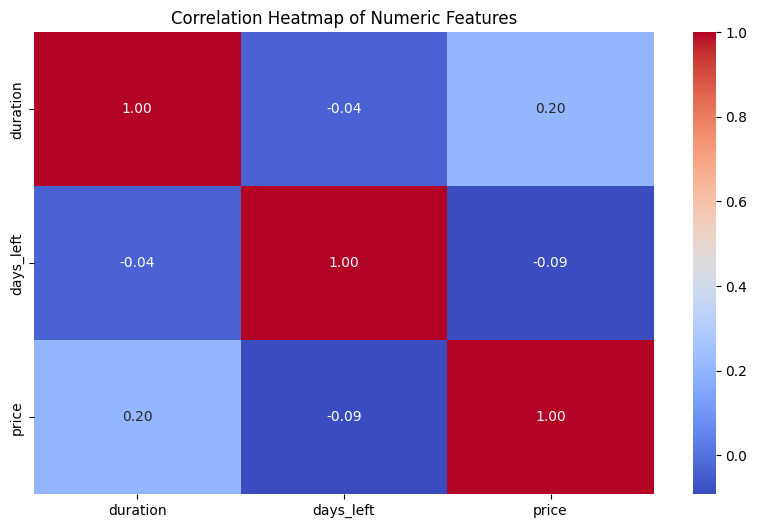

In [31]:
# Correlation Matrix

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

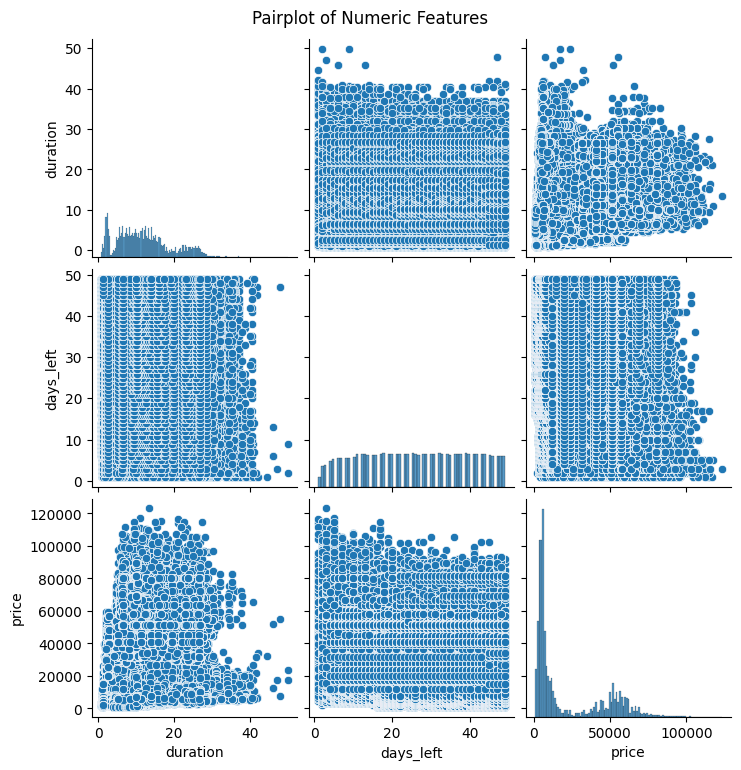

In [32]:
# Pairplot (to visualize relationships)

sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

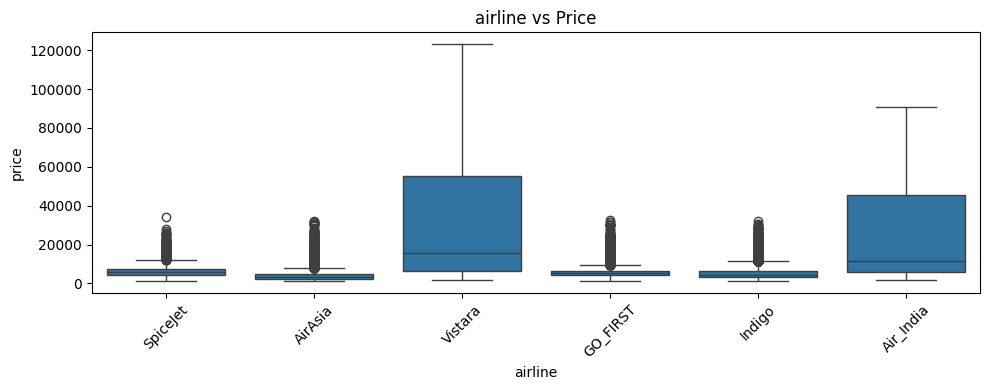

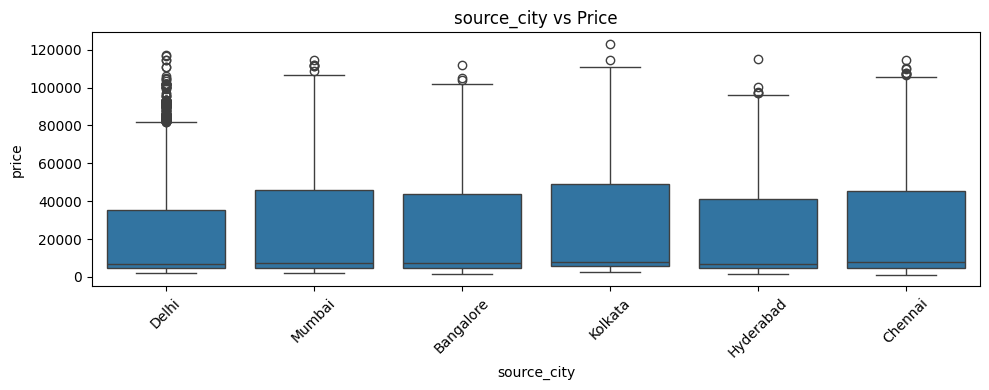

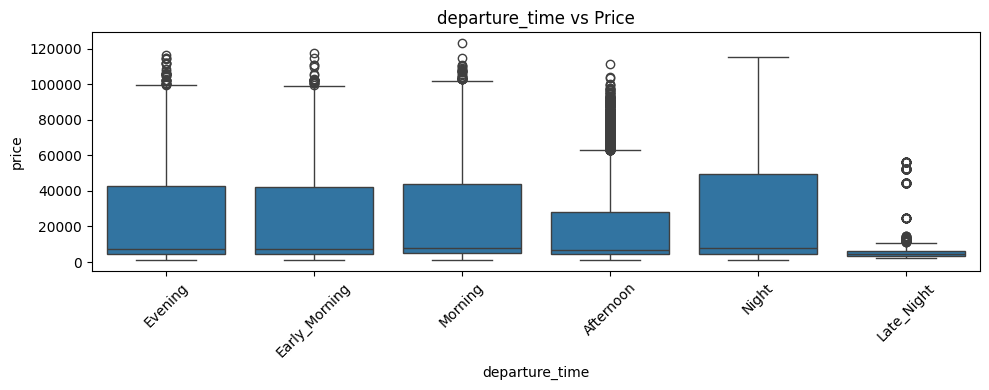

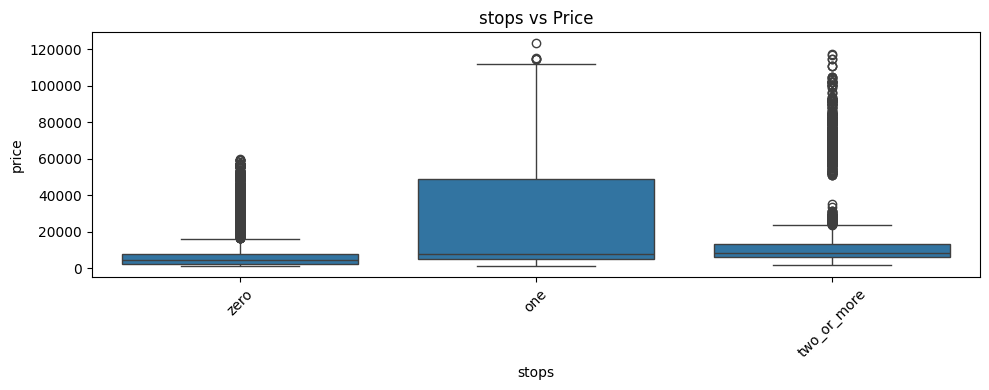

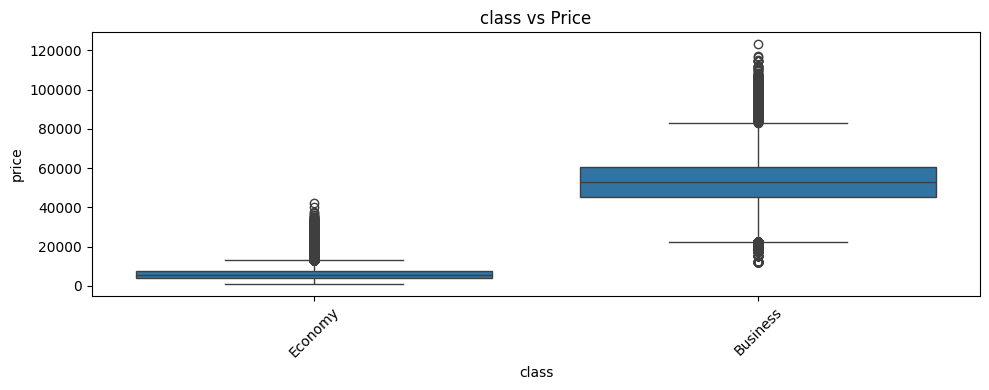

In [33]:
# Categorical values vs Price using Boxplots

categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'class']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"{col} vs Price")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#Sample Observations:
- Business class flights generally cost more than Economy.
- Flights with more stops tend to be cheaper.
- Early bookings (more days_left) usually result in lower prices.